In [106]:
# Importing NLTK and RE Packages
import nltk
import re
import matplotlib.pyplot as plt

# Importing classes within the packages
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk import FreqDist
from wordcloud import WordCloud

# We specify the directory where the transcripts are
file_directory = 'data/transcripts'
 
# We include those filenames ending with '.txt'.
filename_pattern = '.+\.txt'
my_corpus = PlaintextCorpusReader(file_directory, filename_pattern)

In [107]:
print(my_corpus.fileids())

# This is for future use to apply the code to all the text files in the folder

['01_10_15.txt', '19_08_09.txt']


In [108]:
# Extract words from text file

transcript01 = my_corpus.words('19_08_09.txt')
print(transcript01)

# Here, we need to rmeove the punctuation marks from the list.
# So, we adopt a different approach using strings

['"', 'Sir', ',', 'I', 'had', 'not', 'intended', 'to', ...]


In [109]:
# Reading the text file

data=''
with open('data/transcripts/19_08_09.txt','r') as file:
    for line in file:
        s = str(line).strip()
        data = data + s + ' '
        
data = data.lower()

In [110]:
data_split = data.split(" ")
print(len(data_split))

912


In [111]:
# Removing punctuations and only considering words

pattern = r"\w+"
reg_split = re.findall(pattern,data)

print(len(reg_split))

887


In [112]:
# Tokenizing all the data

tokenizer = RegexpTokenizer(r'\w+')

data_tokens = tokenizer.tokenize(data)

print(len(data_tokens))

887


In [113]:
# Now we remove stopwords from the data

stop_words = stopwords.words('english')

clean_data = []
print("Before removing stopwords: " , len(data_tokens))

for w in data_tokens:
    if w not in stop_words:
        clean_data.append(w)        

print("After removing stopwords: " , len(clean_data))

Before removing stopwords:  887
After removing stopwords:  410


In [114]:
# We stem the data using Porter Stemmer

stemmed_data=[]
stemmer = PorterStemmer()

for w in clean_data:
    stemmed_data.append(stemmer.stem(w))
    
print(len(stemmed_data))

410


In [115]:
# Attach Parts of Speech to each word belonging to the clean data

pos_data = pos_tag(clean_data)
print(len(pos_data))

410


In [116]:
# We simplify the Parts of Speech tags
# We want to convert NNS to n and VBD to v

data_output=[]

for w in pos_data:
    data_output.append((w[0], w[1][0].lower()))

print(len(data_output))

410


In [117]:
# We use a Word Lemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized_data=[]

for w in clean_data: 
    lemmatized_data.append(lemmatizer.lemmatize(w))
    
print(len(lemmatized_data))

410


In [118]:
# We combine the POS Tags and Lemmatized data

lemma_output_data = []

for w in data_output:
    word = w[0]
    pos_word = w[1]
    lemma = word
    if pos_word in ['a', 's', 'r', 'n', 'v']:
        lemma = lemmatizer.lemmatize(word, pos=pos_word)
    
    #return (word, pos_tag, lemma)
    lemma_output_data.append((word,pos_word,lemma))
    
print(len(lemma_output_data))

410


In [119]:
# Getting frequencies

data_freq=[]

for lemma_tag in lemma_output_data:
    data_freq.append(lemma_tag[2])

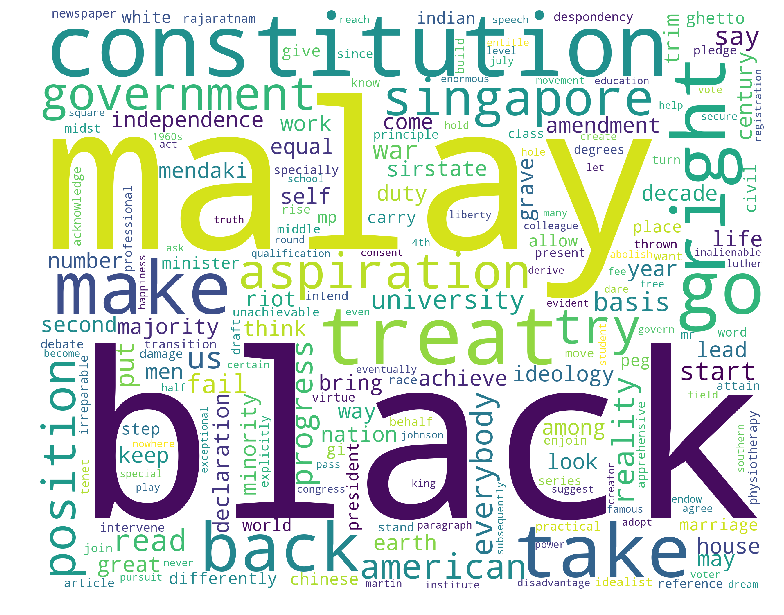

In [120]:
def word_cloud(data, color = 'black'):
    words = ' '.join(data)
    wordcloud = WordCloud(background_color=color,width=2500,height=2000).generate(words)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
word_cloud(data_freq,'white')